# Processing Results for Battery RUL Data

Make sure to use same version of pandas as on the Raspberry Pi

In [1]:
!pip install pandas==1.5.2
!mkdir Plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


## Mount Google Drive

In [2]:
# import google drive
from google.colab import drive

# mount drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load .pkl files from Drive

In [3]:
model_list=['DeTr','ELM']
model_name=['Transformer','ELM']
dataset_list=['NASA','CALCE']
kind_list=['OSP','MSP']

Alternatively, upload the .pkl files directly to /content/ 
Change paths as needed

In [4]:
import shutil

dest = '/content/'
drive_src = '/content/drive/MyDrive/CoE ECE 198/Results'

for model, name in zip(model_list, model_name):
  for dataset in dataset_list:
    for kind in kind_list:
      src = f"{drive_src}/Results_{model}_{dataset}/"
      filename = f"{kind}_{name}_{dataset}.pkl"
      print(f"Copying {src+filename} to {dest}")                       
      shutil.copy(src+filename,dest)  

shutil.copy(f'{drive_src}/Results_LSTM_NASA/MSP_LSTM_NASA.pkl',dest)
shutil.copy(f'{drive_src}/Results_LSTM_CALCE/MSP_LSTM_CALCE.pkl',dest)
shutil.copy(f'{drive_src}/Results_RNN_NASA/OSP_RNN_NASA.pkl',dest)
shutil.copy(f'{drive_src}/Results_RNN_CALCE/OSP_RNN_CALCE.pkl',dest)

Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_NASA/OSP_Transformer_NASA.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_NASA/MSP_Transformer_NASA.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_CALCE/OSP_Transformer_CALCE.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_CALCE/MSP_Transformer_CALCE.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_NASA/OSP_ELM_NASA.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_NASA/MSP_ELM_NASA.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_CALCE/OSP_ELM_CALCE.pkl to /content/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_CALCE/MSP_ELM_CALCE.pkl to /content/


'/content/OSP_RNN_CALCE.pkl'

## Load pickles

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
OSP, MSP = {}, {}

for name in model_name:
  OSP[name] = {}
  MSP[name] = {}

  for dataset in dataset_list:
    OSP[name][dataset] = pd.read_pickle(f"OSP_{name}_{dataset}.pkl") 
    MSP[name][dataset] = pd.read_pickle(f"MSP_{name}_{dataset}.pkl") 

MSP['LSTM'] = {}
MSP['LSTM']['NASA'] = pd.read_pickle(f"MSP_LSTM_NASA.pkl")
MSP['LSTM']['CALCE'] = pd.read_pickle(f"MSP_LSTM_CALCE.pkl")

OSP['RNN']={}
OSP['RNN']['NASA'] = pd.read_pickle(f"OSP_RNN_NASA.pkl")
OSP['RNN']['CALCE'] = pd.read_pickle(f"OSP_RNN_CALCE.pkl")

## Denoising Transformer Results

###One-step ahead

In [6]:
OSP['Transformer']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,8450.479492,0.282198,99.539817,0.006240,0.000100,-1,-0.090909
1,B0006,8437.343750,0.272448,99.350667,0.008337,0.000132,-2,-0.666667
2,B0007,8436.526367,0.272167,99.679161,0.004705,0.000066,1,0.017857
3,B0018,8435.417969,0.208469,99.212587,0.010890,0.000472,0,0.000000


In [7]:
OSP['Transformer']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,23065.695312,3.457784,98.215625,0.008735,0.000260,-1,-0.011765
1,CS2_36,23056.114258,2.580896,97.937548,0.009165,0.000141,5,0.086207
2,CS2_37,23054.416992,2.725054,98.560477,0.007598,0.000125,-1,-0.009346
3,CS2_38,23053.434570,2.740050,98.498744,0.008206,0.000171,-14,-0.114754


Compute average performance

In [8]:
OSP_Transformer_NASA = {
    "model_name": "Transformer",
    "mem_usage" : OSP['Transformer']['NASA']['mem_usage'].mean(),
    "exec_time" : OSP['Transformer']['NASA']['exec_time'].mean(),
    "acc"       : OSP['Transformer']['NASA']['acc'].mean(),
    "mae"       : OSP['Transformer']['NASA']['mae'].mean(),
    "rmse"      : OSP['Transformer']['NASA']['rmse'].mean(),
    "rul_error" : OSP['Transformer']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['Transformer']['NASA']['RUL_relative_error'].abs().mean(),
}

OSP_Transformer_CALCE = {
    "model_name": "Transformer",
    "mem_usage" : OSP['Transformer']['CALCE']['mem_usage'].mean(),
    "exec_time" : OSP['Transformer']['CALCE']['exec_time'].mean(),
    "acc"       : OSP['Transformer']['CALCE']['acc'].mean(),
    "mae"       : OSP['Transformer']['CALCE']['mae'].mean(),
    "rmse"      : OSP['Transformer']['CALCE']['rmse'].mean(),
    "rul_error" : OSP['Transformer']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['Transformer']['CALCE']['RUL_relative_error'].abs().mean(),
}

###Multi-step ahead

In [9]:
MSP['Transformer']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,8443.964844,0.469983,97.469385,0.035052,0.037384,-16,-0.592593
1,B0006,8437.690430,0.449481,95.972753,0.051759,0.056422,-16,-0.842105
2,B0007,8435.503906,0.431577,98.995688,0.014755,0.019104,9,0.125000
3,B0018,8435.463867,0.376771,97.989850,0.028377,0.031970,-10,-0.416667


In [10]:
MSP['Transformer']['CALCE']['acc'] = MSP['Transformer']['CALCE']['acc'] * 100
MSP['Transformer']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,23044.916016,2.927549,86.163628,0.064958,0.087489,-50,-0.335570
1,CS2_36,23045.955078,3.115000,90.745314,0.045209,0.056550,19,0.155738
2,CS2_37,23042.001953,3.822152,95.955591,0.019446,0.025919,-10,-0.058480
3,CS2_38,23041.798828,3.297731,95.391737,0.025616,0.031497,6,0.032258


Compute average performance

In [11]:
MSP_Transformer_NASA = {
    "model_name": "Transformer",
    "mem_usage" : MSP['Transformer']['NASA']['mem_usage'].mean(),
    "exec_time" : MSP['Transformer']['NASA']['exec_time'].mean(),
    "acc"       : MSP['Transformer']['NASA']['acc'].mean(),
    "mae"       : MSP['Transformer']['NASA']['mae'].mean(),
    "rmse"      : MSP['Transformer']['NASA']['rmse'].mean(),
    "rul_error" : MSP['Transformer']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['Transformer']['NASA']['RUL_relative_error'].abs().mean()
}

MSP_Transformer_CALCE = {
    "model_name": "Transformer",
    "mem_usage" : MSP['Transformer']['CALCE']['mem_usage'].mean(),
    "exec_time" : MSP['Transformer']['CALCE']['exec_time'].mean(),
    "acc"       : MSP['Transformer']['CALCE']['acc'].mean(),
    "mae"       : MSP['Transformer']['CALCE']['mae'].mean(),
    "rmse"      : MSP['Transformer']['CALCE']['rmse'].mean(),
    "rul_error" : MSP['Transformer']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['Transformer']['CALCE']['RUL_relative_error'].abs().mean()
}

## Extreme Learning Machine (ELM) Results

###One-step ahead

In [12]:
OSP['ELM']['NASA']['acc'] = OSP['ELM']['NASA']['acc'] * 100
OSP['ELM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,28645.042969,0.336447,99.465567,0.007244,0.000104,-1,0.090909
1,B0006,28641.761719,0.046279,98.618238,0.017635,0.000469,-2,0.666667
2,B0007,28641.761719,0.046761,99.695510,0.004448,0.000064,2,0.035714
3,B0018,28640.613281,0.035380,98.965815,0.014263,0.000587,-1,0.125000


In [13]:
OSP['ELM']['CALCE']['acc'] = OSP['ELM']['CALCE']['acc'] * 100
OSP['ELM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,43368.362305,1.038193,98.203060,0.008414,0.000282,-1,0.011765
1,CS2_36,43363.984375,0.784657,97.978561,0.008529,0.000136,7,0.120690
2,CS2_37,43364.617188,0.947196,98.678850,0.006704,0.000113,-1,0.009346
3,CS2_38,43364.791992,0.892711,98.742260,0.006957,0.000174,-1,0.008197


Compute average performance

In [14]:
OSP_ELM_NASA = {
    "model_name": "ELM",
    "mem_usage" : OSP['ELM']['NASA']['mem_usage'].mean(),
    "exec_time" : OSP['ELM']['NASA']['exec_time'].mean(),
    "acc"       : OSP['ELM']['NASA']['acc'].mean(),
    "mae"       : OSP['ELM']['NASA']['mae'].mean(),
    "rmse"      : OSP['ELM']['NASA']['rmse'].mean(),
    "rul_error" : OSP['ELM']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['ELM']['NASA']['RUL_relative_error'].abs().mean(),
}

OSP_ELM_CALCE = {
    "model_name": "ELM",
    "mem_usage" : OSP['ELM']['CALCE']['mem_usage'].mean(),
    "exec_time" : OSP['ELM']['CALCE']['exec_time'].mean(),
    "acc"       : OSP['ELM']['CALCE']['acc'].mean(),
    "mae"       : OSP['ELM']['CALCE']['mae'].mean(),
    "rmse"      : OSP['ELM']['CALCE']['rmse'].mean(),
    "rul_error" : OSP['ELM']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['ELM']['CALCE']['RUL_relative_error'].abs().mean(),
}

###Multi-step ahead

In [15]:
MSP['ELM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,28639.676758,0.036425,97.081542,0.039317,0.043396,-16,-0.941176
1,B0006,28639.676758,0.043902,95.049081,0.061785,0.075344,-6,-0.666667
2,B0007,28639.676758,0.041260,97.665443,0.034083,0.038580,18,0.290323
3,B0018,28639.254883,0.030310,98.466373,0.021560,0.026480,-5,-0.333333


In [16]:
MSP['ELM']['CALCE']['acc'] = MSP['ELM']['CALCE']['acc'] * 100
MSP['ELM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,43348.937500,0.836184,93.150112,0.031570,0.047011,-15,-0.135135
1,CS2_36,43349.429688,0.880160,86.286938,0.064123,0.071877,31,0.373494
2,CS2_37,43349.781250,0.925396,91.275721,0.045481,0.055052,16,0.120301
3,CS2_38,43349.992188,0.946703,87.085914,0.066536,0.077494,31,0.210884


Compute Average Performance

In [17]:
MSP_ELM_NASA = {
    "model_name": "ELM",
    "mem_usage" : MSP['ELM']['NASA']['mem_usage'].mean(),
    "exec_time" : MSP['ELM']['NASA']['exec_time'].mean(),
    "acc"       : MSP['ELM']['NASA']['acc'].mean(),
    "mae"       : MSP['ELM']['NASA']['mae'].mean(),
    "rmse"      : MSP['ELM']['NASA']['rmse'].mean(),
    "rul_error" : MSP['ELM']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['ELM']['NASA']['RUL_relative_error'].abs().mean(),
}

MSP_ELM_CALCE = {
    "model_name": "ELM",
    "mem_usage" : MSP['ELM']['CALCE']['mem_usage'].mean(),
    "exec_time" : MSP['ELM']['CALCE']['exec_time'].mean(),
    "acc"       : MSP['ELM']['CALCE']['acc'].mean(),
    "mae"       : MSP['ELM']['CALCE']['mae'].mean(),
    "rmse"      : MSP['ELM']['CALCE']['rmse'].mean(),
    "rul_error" : MSP['ELM']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['ELM']['CALCE']['RUL_relative_error'].abs().mean(),
}

## Recurrent Neural Network (RNN) Results

### One-Step Ahead

In [18]:
OSP['RNN']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,49995.856445,0.730114,99.518873,0.007596,0.013121,1,-0.010309
1,B0006,49908.843750,0.131812,98.724786,0.018406,0.029912,0,0.000000
2,B0007,49907.550781,0.128000,98.679082,0.021296,0.023090,-7,0.056452
3,B0018,49907.543945,0.127712,97.681072,0.036039,0.044692,16,-0.222222


In [19]:
OSP['RNN']['CALCE']['acc'] = OSP['RNN']['CALCE']['acc']*100
OSP['RNN']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,49995.524414,0.548058,98.917786,0.007188,0.013168,-1,0.001565
1,CS2_36,49904.170898,0.564169,98.186296,0.008593,0.015929,-1,0.001553
2,CS2_37,49904.739258,0.583606,98.888374,0.007407,0.013061,-2,0.002797
3,CS2_38,49903.704102,0.596143,98.842405,0.008921,0.015838,7,-0.009309


Compute average performance

In [20]:
OSP_RNN_NASA = {
    "model_name": "RNN",
    "mem_usage" : OSP['RNN']['NASA']['mem_usage'].mean(),
    "exec_time" : OSP['RNN']['NASA']['exec_time'].mean(),
    "acc"       : OSP['RNN']['NASA']['acc'].mean(),
    "mae"       : OSP['RNN']['NASA']['mae'].mean(),
    "rmse"      : OSP['RNN']['NASA']['rmse'].mean(),
    "rul_error" : OSP['RNN']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['RNN']['NASA']['RUL_relative_error'].abs().mean(),
}

OSP_RNN_CALCE = {
    "model_name": "RNN",
    "mem_usage" : OSP['RNN']['CALCE']['mem_usage'].mean(),
    "exec_time" : OSP['RNN']['CALCE']['exec_time'].mean(),
    "acc"       : OSP['RNN']['CALCE']['acc'].mean(),
    "mae"       : OSP['RNN']['CALCE']['mae'].mean(),
    "rmse"      : OSP['RNN']['CALCE']['rmse'].mean(),
    "rul_error" : OSP['RNN']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : OSP['RNN']['CALCE']['RUL_relative_error'].abs().mean(),
}

## Long Short-Term Memory (LSTM) Results

### Multi-Step-Ahead

In [21]:
MSP['LSTM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,22389.431641,0.380253,97.888510,0.028328,0.036307,1,0.055556
1,B0006,22372.606445,0.157190,94.793953,0.066007,0.078208,9,0.900000
2,B0007,22371.189453,0.163253,98.766512,0.018385,0.022392,13,0.206349
3,B0018,22370.845703,0.129936,91.792060,0.114235,0.135304,6,0.400000


In [22]:
MSP['LSTM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,37130.537109,7.571742,92.404461,0.036601,0.049050,-31,0.279279
1,CS2_36,39678.373047,6.504801,85.899258,0.041940,0.061139,15,-0.178571
2,CS2_37,39683.886719,6.500294,96.098977,0.019793,0.025034,-3,0.022556
3,CS2_38,37125.567383,7.339950,94.281662,0.032162,0.040449,25,-0.160256


In [23]:
MSP_LSTM_NASA = {
    "model_name": "LSTM",
    "mem_usage" : MSP['LSTM']['NASA']['mem_usage'].mean(),
    "exec_time" : MSP['LSTM']['NASA']['exec_time'].mean(),
    "acc"       : MSP['LSTM']['NASA']['acc'].mean(),
    "mae"       : MSP['LSTM']['NASA']['mae'].mean(),
    "rmse"      : MSP['LSTM']['NASA']['rmse'].mean(),
    "rul_error" : MSP['LSTM']['NASA']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['LSTM']['NASA']['RUL_relative_error'].abs().mean(),
}

MSP_LSTM_CALCE = {
    "model_name": "LSTM",
    "mem_usage" : MSP['LSTM']['CALCE']['mem_usage'].mean(),
    "exec_time" : MSP['LSTM']['CALCE']['exec_time'].mean(),
    "acc"       : MSP['LSTM']['CALCE']['acc'].mean(),
    "mae"       : MSP['LSTM']['CALCE']['mae'].mean(),
    "rmse"      : MSP['LSTM']['CALCE']['rmse'].mean(),
    "rul_error" : MSP['LSTM']['CALCE']['rul_error'].abs().mean(),
    "RUL_relative_error" : MSP['LSTM']['CALCE']['RUL_relative_error'].abs().mean(),
}

## Generate Graphs

### One-step Ahead

In [24]:
# NASA
OSP_NASA_Results = pd.DataFrame([
                    OSP_Transformer_NASA,
                    OSP_ELM_NASA,
                    OSP_RNN_NASA
                  ])
OSP_NASA_Results

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,Transformer,8439.941895,0.258820,99.445558,0.007543,0.000193,1.0,0.193858
1,ELM,28642.294922,0.116217,99.186282,0.010897,0.000306,1.5,0.229573
2,RNN,49929.948730,0.279409,98.650953,0.020834,0.027704,6.0,0.072246


In [25]:
OSP_CALCE_Results = pd.DataFrame([
                    OSP_Transformer_CALCE,
                    OSP_ELM_CALCE,
                    OSP_RNN_CALCE
                  ])
OSP_CALCE_Results

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,Transformer,23057.415283,2.875946,98.303099,0.008426,0.000174,5.25,0.055518
1,ELM,43365.438965,0.915689,98.400683,0.007651,0.000176,2.50,0.037499
2,RNN,49927.034668,0.572994,98.708716,0.008027,0.014499,2.75,0.003806


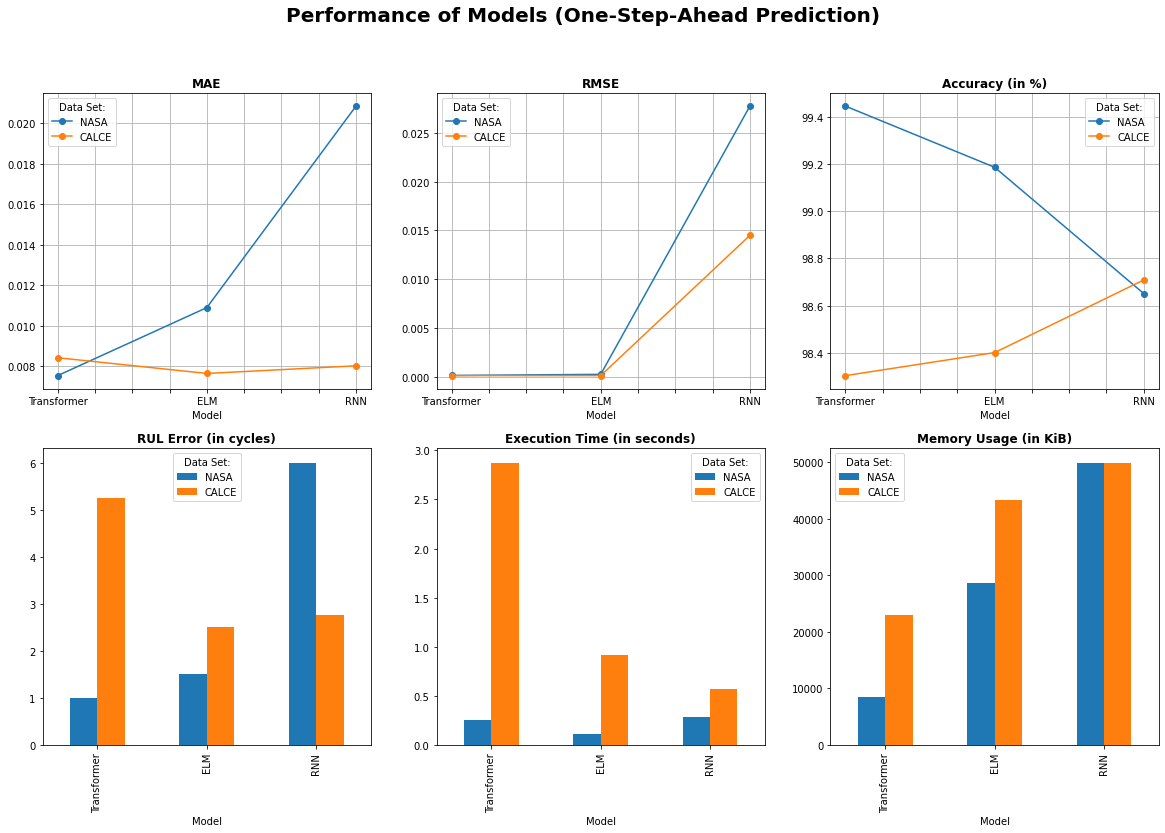

In [26]:
plt.figure(figsize=(20,12))

plt.suptitle('Performance of Models (One-Step-Ahead Prediction)', size=20, weight='bold')
df = OSP_NASA_Results
df2 = OSP_CALCE_Results

mem = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mem_usage'],
    "CALCE": OSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rul_error'],
    "CALCE": OSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['exec_time'],
    "CALCE": OSP_CALCE_Results['exec_time']
})

# MAE

plt.subplot(2,3,1)
df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE
plt.subplot(2,3,2)
df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('RMSE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Accuracy
plt.subplot(2,3,3)
df.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('Accuracy (in %)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RUL Error
rulerror.set_index("model_name").plot(ax=plt.subplot(2,3,4),kind='bar')
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Execution Time
exectime.set_index("model_name").plot(ax=plt.subplot(2,3,5), kind='bar')
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot(ax=plt.subplot(2,3,6), kind='bar')
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Comparison_OSP.pdf')

### Multi-Step Ahead

In [27]:
# NASA
MSP_NASA_Results = pd.DataFrame([
                    MSP_Transformer_NASA,
                    MSP_ELM_NASA,
                    MSP_LSTM_NASA
                  ])
MSP_NASA_Results

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,Transformer,8438.155762,0.431953,97.606919,0.032486,0.036220,12.75,0.494091
1,ELM,28639.571289,0.037974,97.065610,0.039186,0.045950,11.25,0.557875
2,LSTM,22376.018311,0.207658,95.810259,0.056739,0.068052,7.25,0.390476


In [28]:
# CALCE
MSP_CALCE_Results = pd.DataFrame([
                    MSP_Transformer_CALCE,
                    MSP_ELM_CALCE,
                    MSP_LSTM_CALCE
                  ])
MSP_CALCE_Results

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,Transformer,23043.667969,3.290608,92.064067,0.038807,0.050364,21.25,0.145511
1,ELM,43349.535156,0.897111,89.449671,0.051927,0.062859,23.25,0.209954
2,LSTM,38404.591064,6.979197,92.171089,0.032624,0.043918,18.50,0.160166


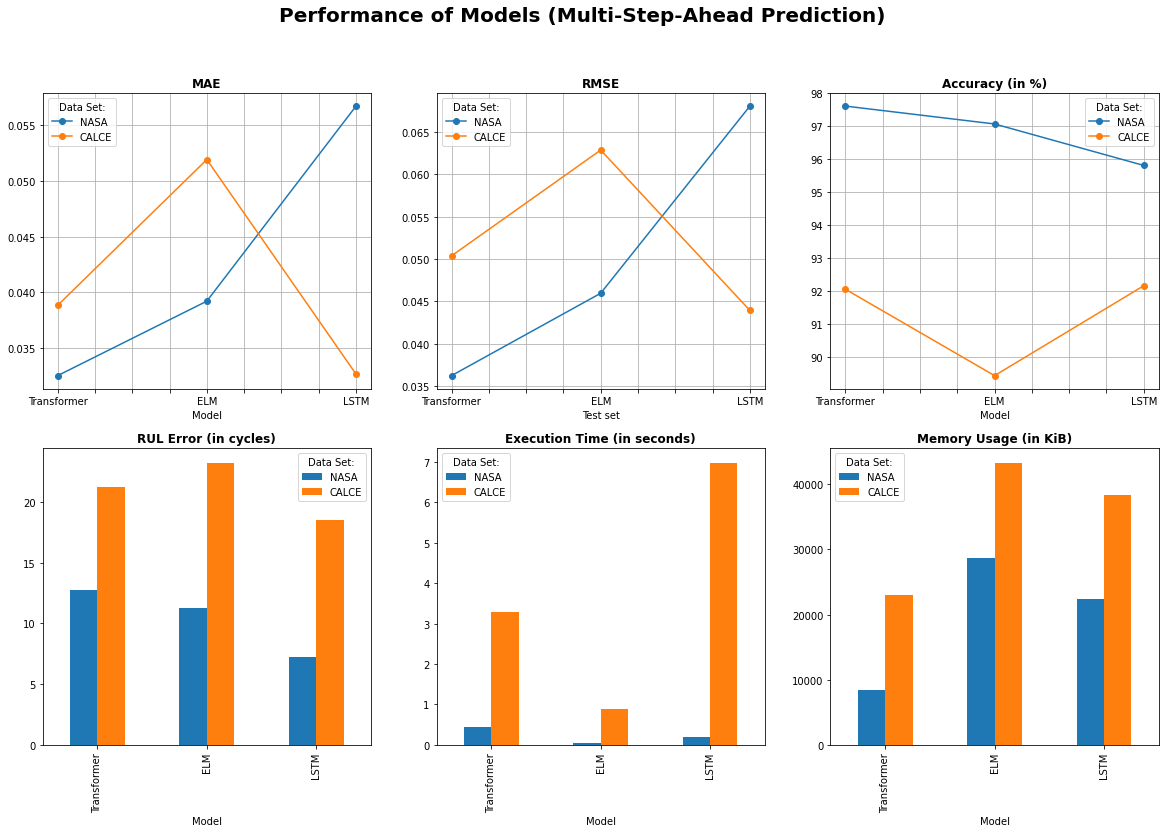

In [29]:
plt.figure(figsize=(20,12))

plt.suptitle('Performance of Models (Multi-Step-Ahead Prediction)', size=20, weight='bold')
df = MSP_NASA_Results
df2 = MSP_CALCE_Results

mem = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['mem_usage'],
    "CALCE": MSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rul_error'],
    "CALCE": MSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['exec_time'],
    "CALCE": MSP_CALCE_Results['exec_time']
})

# MAE

plt.subplot(2,3,1)
df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE
plt.subplot(2,3,2)
df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('RMSE',weight='bold')
plt.xlabel("Test set")
plt.legend(title="Data Set:")

# Accuracy
plt.subplot(2,3,3)
df.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="NASA")
df2.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="CALCE")
plt.title('Accuracy (in %)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RUL Error
rulerror.set_index("model_name").plot(ax=plt.subplot(2,3,4),kind='bar')
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Execution Time
exectime.set_index("model_name").plot(ax=plt.subplot(2,3,5), kind='bar')
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot(ax=plt.subplot(2,3,6), kind='bar')
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Comparison_MSP.pdf')